

# 1. 다층 퍼셉트론(MultiLayer Perceptron, MLP)
---

MLP를 통해서 텍스트 분류를 수행해보자

<br/><br/>

# 2. 케라스의 texts_to_matrix() 이해하기
---

다음 예시를 통해 Tokenizer의 texts_to_matrix()를 이해해보자.
먼저 설명부터 하자면, Tokenizer에 학습된 단어 집합들로 텍스트 데이터들을 4개의 mode에 따라 행렬화 해주는 기능을 한다.

예시를 보자.


In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print("정수 인덱싱 : ",tokenizer.word_index) 


정수 인덱싱 :  {'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [2]:
# mode = 'count' : 단어의 출현 빈도수를 카운트함.
print(tokenizer.texts_to_matrix(texts, mode = 'count')) 

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [3]:
# mode = 'binary' : 단어의 존재 유무를 표현함.
print(tokenizer.texts_to_matrix(texts, mode = 'binary')) 

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


TF-IDF가 기억이 나지 않아서 한번 간단히 요약한다. 식은 외울 필요는 없고 **값이 가지는 의미를 기억하자.**
> TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단한다. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것이다.

In [4]:
# mode = 'tfidf' : 단어의 중요도를 표현함. 단어가 전체 문서에서 적게 등장할 수록 값이 커짐. 즉, 중요도가 높다는 뜻.
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) 

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [5]:
# mode = 'freq' : 각 문서에서 단어의 등장 횟수를 분자로, 각 문서의 크기(단어의 수)를 분모로 해서 표현한 빈도 수 
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) 

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


<br/><br/>

# 3. 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해
---

사이킷런에서는 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터를 제공해준다. 파라미터 subset의 값으로 'all'을 넣으면 전체 데이터인 18,846개의 샘플을 다운로드할 수 있으며, 'train'을 넣으면 훈련 데이터를, 'test'를 넣으면 테스트 데이터를 다운로드할 수 있다.


In [6]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.
print(newsdata.keys())
print()
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

훈련용 샘플의 개수 : 11314
총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### 이번 실습의 목적은 **테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것**이다. 

먼저 첫번째 샘플의 정보를 확인해보자.

In [7]:
print("-"*20)
print("# 첫번째 샘플의 데이터")
print()
print(newsdata.data[0])

print("# 첫번째 샘플의 타겟 : ",newsdata.target[0])
print("# 첫번째 샘플의 타겟의 주제 : ",newsdata.target_names[newsdata.target[0]])

print("-"*20)

--------------------
# 첫번째 샘플의 데이터

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





# 첫번째 샘플의 타겟 :  7
# 첫번째 샘플의 타겟의 주제 :  rec.autos
--------------------


### 본격적으로 학습에 돌입하기 위해 데이터 프레임을 생성하자.

In [8]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


### 항상 데이터를 확인하는 습관을 갖자.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


### null 값을 찾거나 중복이 있는지 확인하자.

In [10]:
# null 값 확인
print(data.isnull().values.any())

print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

False
중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


### 타겟의 분포를 시각화

시각화 해보면 10번이 가장 많고, 19번이 가장 적은 것을 알 수 있다.

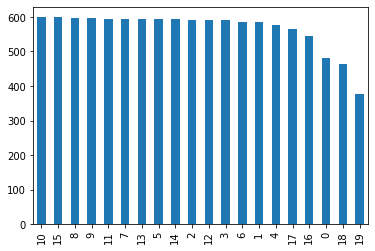

In [11]:
import matplotlib.pyplot as plt
data['target'].value_counts().plot(kind='bar');

In [12]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


### 학습/테스트 데이터 셋 불러오기

In [13]:
newsdata_test = fetch_20newsgroups(subset='test',shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

### Tokenizer로 전처리

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

vocab_size = 10000
num_classes = 20

def prepare_data(train_data,test_data,mode):
    tokenizer=Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data,mode=mode)
    X_test = tokenizer.texts_to_matrix(test_data,mode=mode)
    
    return X_train,X_test,tokenizer.index_word

# 입력 텍스트 데이터들을 binary 모드로 matrix화 
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') 

# 레이블 데이터들을 원-핫 인코딩
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩


In [15]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)
빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


<br/><br/>

# 4. 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기
---

이제 MLP를 설계해보자.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
def fit_and_eval(X_train,y_train,X_test,y_test):
    model = Sequential()
    model.add(Dense(256,input_shape=(vocab_size,),activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]


In [17]:

modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_eval(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)
    

Epoch 1/5
80/80 [==============================] - 1s 5ms/step - loss: 2.2764 - accuracy: 0.3363 - val_loss: 0.9853 - val_accuracy: 0.8083
Epoch 2/5
80/80 [==============================] - 0s 5ms/step - loss: 0.8828 - accuracy: 0.7561 - val_loss: 0.4693 - val_accuracy: 0.8772
Epoch 3/5
80/80 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.8789 - val_loss: 0.3611 - val_accuracy: 0.9037
Epoch 4/5
80/80 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.9343 - val_loss: 0.3182 - val_accuracy: 0.9046
Epoch 5/5
80/80 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.9571 - val_loss: 0.3023 - val_accuracy: 0.9161
binary 모드의 테스트 정확도: 0.829261839389801
Epoch 1/5
80/80 [==============================] - 1s 5ms/step - loss: 2.7417 - accuracy: 0.2407 - val_loss: 1.6786 - val_accuracy: 0.7412
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 1.4879 - accuracy: 0.6209 - val_loss: 0.7804 - val_accura